<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importando-Bibliotecas" data-toc-modified-id="Importando-Bibliotecas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importando Bibliotecas</a></span></li><li><span><a href="#Lendo-e-Analisando-Base" data-toc-modified-id="Lendo-e-Analisando-Base-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lendo e Analisando Base</a></span><ul class="toc-item"><li><span><a href="#Explicação-sobre-as-Features" data-toc-modified-id="Explicação-sobre-as-Features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Explicação sobre as Features</a></span></li><li><span><a href="#Overview-da-Base" data-toc-modified-id="Overview-da-Base-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Overview da Base</a></span></li></ul></li><li><span><a href="#Análise-Exploratória" data-toc-modified-id="Análise-Exploratória-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Análise Exploratória</a></span></li></ul></div>

Este notebook tem por objetivo alocar o desenvolvimento de análise de dados envolvendo campanhas de marketing de uma instituição financeira portuguesa. Possuindo referência no renomado repositório de dados de Machine Laerning [UCI](https://archive.ics.uci.edu/ml/index.php), o conjunto [Bank Marketing Data Set](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) tem origem em um estudo realizado em 2014, onde ações de marketing baseadas principalmente em ligações telefônicas, foram aplicadas a um banco português, gerando assim uma base com 20 atributos relacionados ao tema, além de uma variável resposta indicando se o cliente submeteu (`yes`) ou não (`no`) a um depósito a prazo.

# Importando Bibliotecas

In [1]:
# Bibliotecas do projeto
import pandas as pd
pd.set_option('display.max_columns', 500)
from math import ceil

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Bibliotecas úteis
from utils.viz_utils import *
from utils.prep_utils import *

# Lendo e Analisando Base

In [2]:
# Lendo base de dados
path = '../data/bank.csv'
df_ori = pd.read_csv(path, sep=',')
df_ori.columns = [col.lower().strip().replace('.', '_') for col in df_ori.columns]

print(f'Volumetria: {df_ori.shape}')
df_ori.head()

Volumetria: (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Como mencionado anteriormente, temos 20 atributos e uma variável resposta no conjunto de dados. Pela análise das dimensões do dataset, é possível também pontuar que estamos falando de um conjunto com 41.188 amostras. Para auxiliar no entendimento do contexto do problema de negócio, vamos registrar uma breve descrição de cada uma das variáveis. A fonte das explicações a seguir é a mesma encontrada no [repositório UCI](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) onde este dataset está armazenado.

## Explicação sobre as Features

* **age:** idade do cliente contatado pela instituição financeira _(numérica)_;
* **job:** ocupação empregatícia do cliente _(categórica)_;
* **marital:** estado civil do cliente contatado _(categórica)_;
* **education:** nível de escolaridade do cliente _(categórica)_;
* **default:** cliente possui crédito por padrão? _(categórica)_;
* **housing:** cliente possui imóveis alugados? _(categórica)_;
* **loan:** cliente poissui empréstimo pessoal? _(categórica)_;
* **contact:**  tipo de comunicação utilizada no contato _(categórica)_;
* **month:** mês do último contato _(categórica)_;
* **duration:** duração, em segundos, do último contato. Nota: esse atributo possui grande influência na variável resposta (duração=0, y='no') e seu valor é conhecido somente após a realização do contato. Dessa forma, esta só deve ser incluída nas análises para fins de benchmark, sendo desejável sua exclusão se a abordagem for a criação de um modelo preditivo _(numérica)_;
* **campaign:** quantidade de contatos realizados durante a campanha para o cliente em questão _(numérica)_;
* **pdays:** número de dias após o último contato ao cliente (999 indica que o cliente não foi contatado anteriormente) _(numérica)_;
* **previous:** quantidade de contatos realizados antes da campanha atual para o cliente em questão _(numérica)_;
* **poutcome:** resultado da última campanha de marketing _(categórica)_;

_Variáveis adicionais encontradas somente no dataset bank-adittional do repositório UCI_
* **emp_var_rate:** taxa de variação empregatícia (indicador trimestral) _(numérica)_;
* **cons_price_idx:** índice de preços ao consumidos (indicador mensal) _(numérica)_;
* **cons_conf_idx:** índice de confiança do consumidor (indicador mensal) _(numérica)_;
* **euribor3m:** taxa Euribor 3 meses (indicador diário - mercado monetário da zona do Euro) _(numérica)_;
* **nr_employed:** número de empregados da instituição _(numérica)_;

## Overview da Base

Detalhadas as variáveis, vamos agora observar mais a fundo alguns indicadores essenciais sobre os dados através do método `data_overview()`.

In [3]:
# Instanciando classe de DataPrep
prep = DataPrep()

# Transformando variável resposta
df = df_ori.copy()
df['target'] = (df['deposit'] == 'yes') * 1
df.drop('deposit', axis=1, inplace=True)

# Visualizando dados de forma geral
target = 'target'
df_overview = prep.data_overview(df, label_name=target)
df_overview

,feature,qtd_null,percent_null,dtype,qtd_cat,target_pearson_corr
0,age,0,0.0,int64,0,0.034901
1,day,0,0.0,int64,0,-0.056326
2,poutcome,0,0.0,object,4,NaN
3,previous,0,0.0,int64,0,0.139867
4,pdays,0,0.0,int64,0,0.151593
5,campaign,0,0.0,int64,0,-0.128081
6,duration,0,0.0,int64,0,0.451919
7,month,0,0.0,object,12,NaN
8,contact,0,0.0,object,3,NaN
9,job,0,0.0,object,12,NaN


Analisando o resultado do método `data_overview()` é possível pontuar:

* Não existem dados nulos em nenhuma variável do conjunto de dados;
* Com exceção da feature `duration`, existem alguns outros exemplos com correlações interessantes com a variável target. Por exemplo, `nr_employed`, `emp_var_rate` e `euribor3m` se mostram features promissores a um primeiro momento.

# Análise Exploratória

Essa é uma etapa extremamente válida e útil para o prosseguimento da análise desse conjunto de dados. Nessa sessão, serão aplicadas técnicas de exploração de dados, visualizações e extração de insights para que o conteúdo do dataset possa ser, de fato, entendido como uma poderosa ferramenta preditiva dentro do contexto proposto.

Assim, serão propostas algumas perguntas ao longo dessa etapa que, a partir das técnicas já mencionadas, serão respondidas ou analisadas com maiores detalhes de acordo com as investigações realizadas no conjunto.

**Qual o balanceamento da variável resposta?**

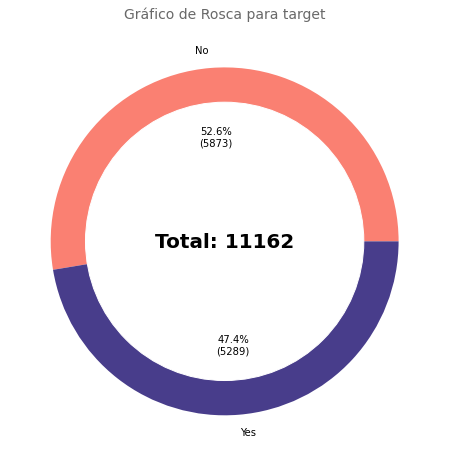

In [4]:
# Plotando gráfico para visualizar o balanceamento do target
label_names = ['No', 'Yes']
color_list = ['salmon', 'darkslateblue']

fig, ax = plt.subplots(figsize=(8, 8))
donut_plot(df, target, label_names, ax=ax, text=f'Total: {len(df)}', colors=color_list)
plt.show()

Pela análise do gráfico, é possível perceber que se trata de um conjunto de dados balanceado, ou seja, a variável resposta possui proporção semelhante para ambas as classes do conjunto.

**Quais as entradas das variáveis categóricas?**

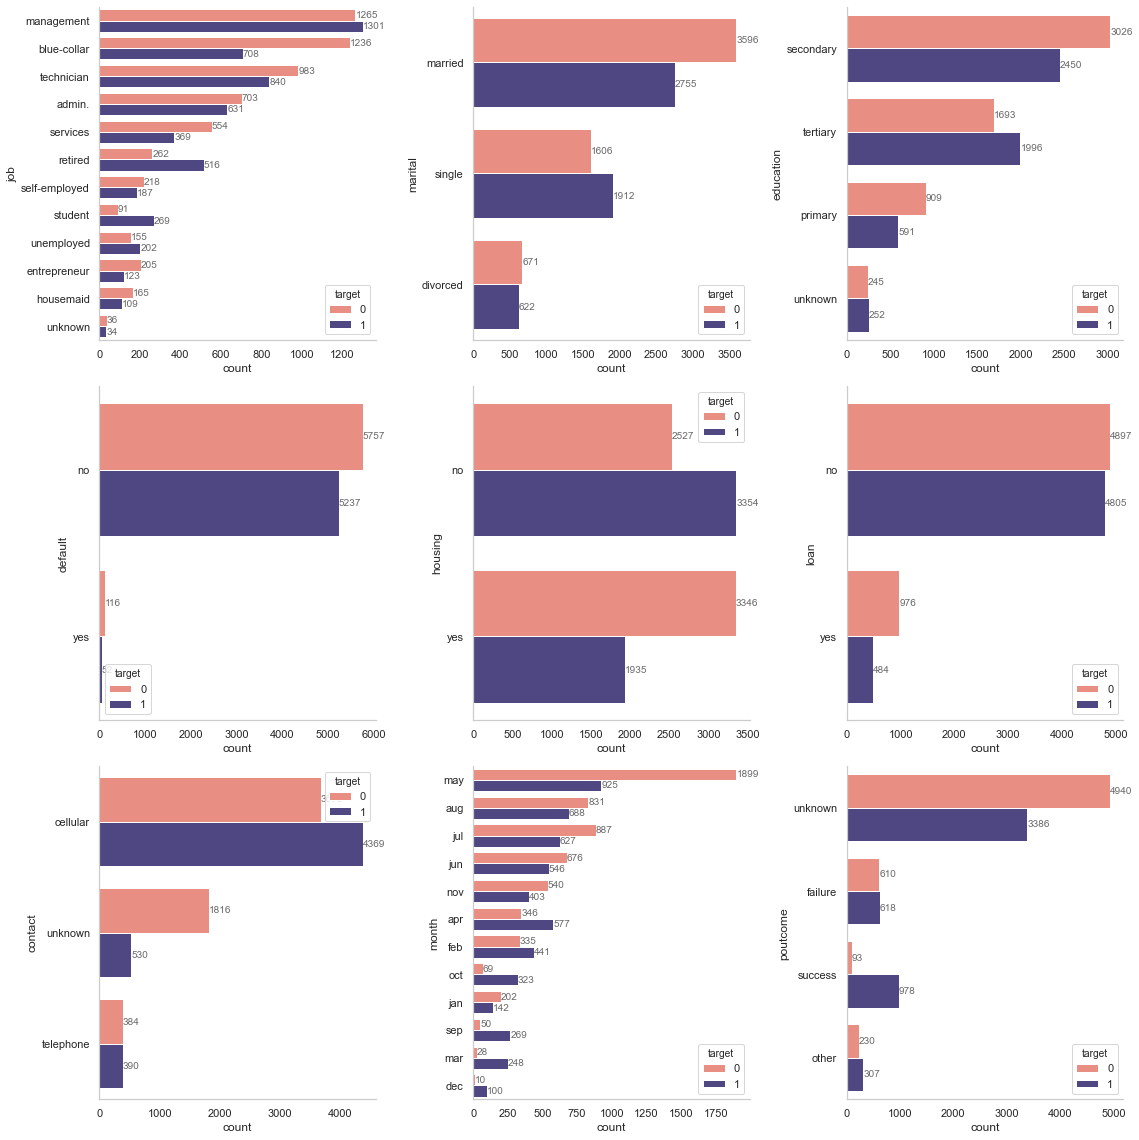

In [11]:
# Visualizando volumetria das entradas categóricas
cat_features = [col for col, dtype in df.dtypes.items() if dtype == 'object']
catplot_analysis(df, cat_features, fig_cols=3, hue='target', palette=['salmon', 'darkslateblue'], figsize=(16, 16))

**Como as variáveis numéricas estão distribuídas?**

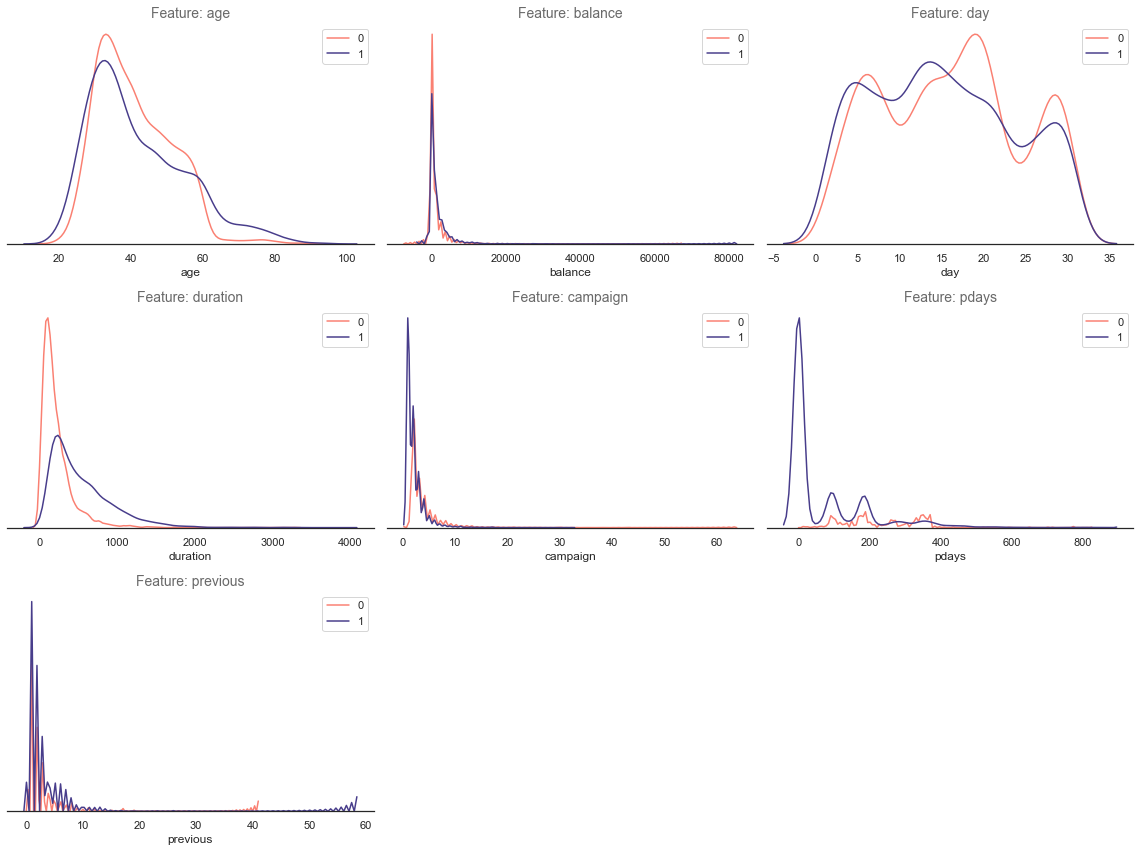

In [9]:
num_features = [col for col, dtype in df.dtypes.items() if dtype != 'object']
num_features.pop(num_features.index('target'))
distplot(df, num_features, fig_cols=3, hue='target', color=['salmon', 'darkslateblue'], figsize=(16, 12))